Evaluating the classification accuracy of BERT, BART, GPT, Llama models (which are politically leaning) on text classification accuracy of politically biased statements. 

In [77]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np

In [5]:

bart = pd.read_csv("data/IBC/sample_ibc.csv")
deberta = pd.read_csv("data/IBC/sample_ibc.csv")

bart

,Unnamed: 0,sentence,label
0,0,"First , government plays an important role thr...",Liberal
1,1,And `` once we think positively about the Stat...,Liberal
2,2,The narrow-minded rationality of the capitalis...,Liberal
3,3,The resulting global warming kills Amazonian t...,Liberal
4,4,If evolution is improvement and improvement is...,Liberal
...,...,...,...
145,145,The group can grow larger still if not only ch...,Neutral
146,146,"At Capital Offenders , an examination of past ...",Neutral
147,147,That Winkler-Koch won every lawsuit but one ( ...,Neutral
148,148,The Secretary of Health and Human Services is ...,Neutral


/opt/miniconda3/envs/cs375/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


NameError: name 'plt' is not defined

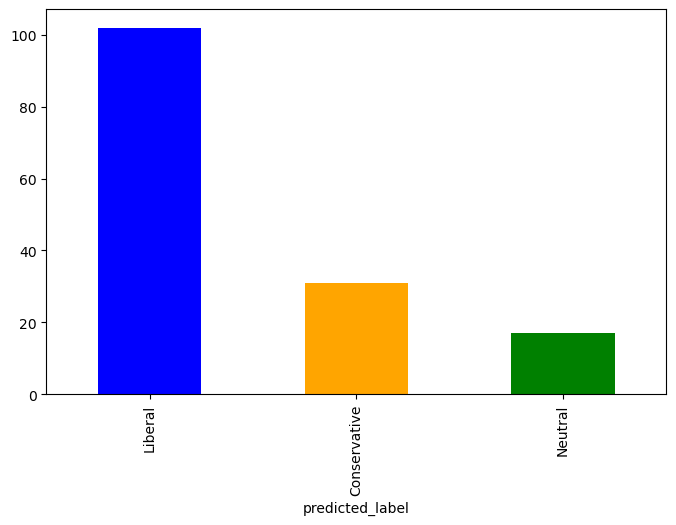

In [ ]:
# bart
pipe = pipeline(model="facebook/bart-large-mnli")

political_labels = ["Liberal", "Conservative", "Neutral"]

def classify_sentence(sentence):
    result = pipe(sentence, candidate_labels=political_labels)
    top_label = result["labels"][0]
    return top_label

bart["predicted_label"] = bart["sentence"].apply(classify_sentence)

label_counts = bart["predicted_label"].value_counts()


# result = pipe(bart.loc[0, "sentence"], candidate_labels=political_labels)
# top_label = result["labels"][0]
# print(bart.iloc[0], top_label)

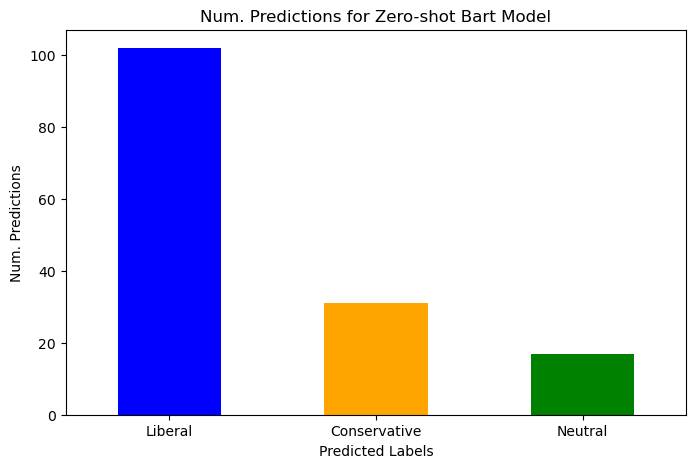

In [9]:
label_counts.plot(kind="bar", color=["blue", "orange", "green"], figsize=(8, 5))
plt.title("Num. Predictions for Zero-shot Bart Model")
plt.xlabel("Predicted Labels")
plt.ylabel("Num. Predictions")
plt.xticks(rotation=0)
plt.show()

In [12]:
correct_predictions = (bart["predicted_label"] == bart["label"]).sum()

total_sentences = len(bart)
accuracy = correct_predictions / total_sentences

print(f"Correct predictions: {correct_predictions}")
print(f"Total sentences: {total_sentences}")
print(f"Accuracy: {accuracy:.2%}")

Correct predictions: 54
Total sentences: 150
Accuracy: 36.00%


In [ ]:
# roberta and deberta, deberta out-performs roberta
# cross-encoder/nli-deberta-v3-base

# bert
pipe = pipeline(model="cross-encoder/nli-deberta-v3-base")

political_labels = ["Liberal", "Conservative", "Neutral"]

def classify_sentence(sentence):
    result = pipe(sentence, candidate_labels=political_labels)
    top_label = result["labels"][0]
    return top_label

deberta["predicted_label"] = deberta["sentence"].apply(classify_sentence)

label_counts_deberta = deberta["predicted_label"].value_counts()


/opt/miniconda3/envs/cs375/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/opt/miniconda3/envs/cs375/lib/python3.11/site-packages/transformers/convert_slow_tokenizer.py:551: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


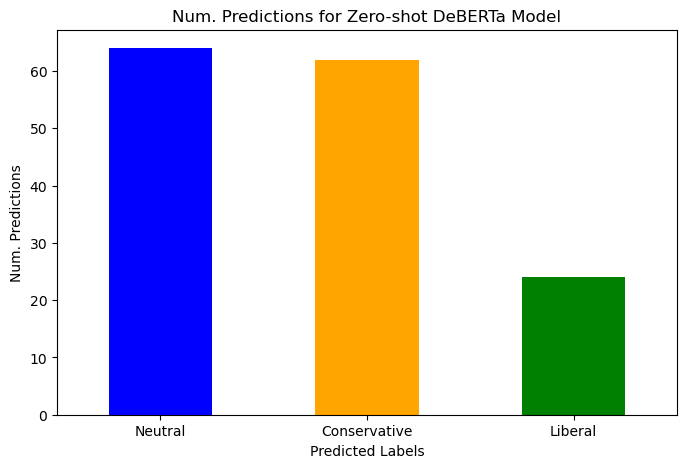

In [11]:
label_counts_deberta.plot(kind="bar", color=["blue", "orange", "green"], figsize=(8, 5))
plt.title("Num. Predictions for Zero-shot DeBERTa Model")
plt.xlabel("Predicted Labels")
plt.ylabel("Num. Predictions")
plt.xticks(rotation=0)
plt.show()

In [13]:
correct_predictions = (deberta["predicted_label"] == deberta["label"]).sum()

total_sentences = len(deberta)
accuracy = correct_predictions / total_sentences

print(f"Correct predictions: {correct_predictions}")
print(f"Total sentences: {total_sentences}")
print(f"Accuracy: {accuracy:.2%}")

Correct predictions: 59
Total sentences: 150
Accuracy: 39.33%


In [12]:
# messed up the data transfer from GPT return, so have to clean
def extract_prediction(sentence):
    return sentence.replace("ChatCompletionMessage(content='", "").replace("', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None)", "")

extract_prediction("ChatCompletionMessage(content='Neutral', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None)")

'Neutral'

In [78]:
gpt4_data = pd.read_csv("results/gpt-4.csv")
gpt4o_data = pd.read_csv("results/gpt-4o.csv")
gpt4omini_data = pd.read_csv("results/gpt-4o-mini.csv")

gpt4_data.classification = gpt4_data.classification.apply(extract_prediction)
gpt4o_data.classification = gpt4o_data.classification.apply(extract_prediction)
gpt4omini_data.classification = gpt4omini_data.classification.apply(extract_prediction)

gpt4_data.iloc[0]


Unnamed: 0                                                        7
sentence          Still , as backlash reactions like the attack ...
label                                                       Liberal
classification                                              Liberal
Name: 0, dtype: object

In [79]:
gpt4_data_libcon = pd.read_csv("results/gpt-4-lib-con.csv")
gpt4o_data_libcon = pd.read_csv("results/gpt-4o-lib-con.csv")
gpt4omini_data_libcon = pd.read_csv("results/gpt-4o-mini-lib-con.csv")

gpt4_data_libcon.classification = gpt4_data_libcon.classification.apply(extract_prediction)
gpt4o_data_libcon.classification = gpt4o_data_libcon.classification.apply(extract_prediction)
gpt4omini_data_libcon.classification = gpt4omini_data_libcon.classification.apply(extract_prediction)

In [80]:
liberal_preds = {"gpt-4": gpt4_data.classification.value_counts()["Liberal"], 
                 "gpt-4o": gpt4o_data.classification.value_counts()["Liberal"], 
                 "gpt-4o-mini": gpt4omini_data.classification.value_counts()["Liberal"]}

neutral_preds = {"gpt-4": gpt4_data.classification.value_counts()["Neutral"], 
                 "gpt-4o": gpt4o_data.classification.value_counts()["Neutral"], 
                 "gpt-4o-mini": gpt4omini_data.classification.value_counts()["Neutral"]}

conservative_preds = {"gpt-4": gpt4_data.classification.value_counts()["Conservative"], 
                 "gpt-4o": gpt4o_data.classification.value_counts()["Conservative"], 
                 "gpt-4o-mini": gpt4omini_data.classification.value_counts()["Conservative"]}

print(liberal_preds, neutral_preds, conservative_preds)

{'gpt-4': 40, 'gpt-4o': 36, 'gpt-4o-mini': 41} {'gpt-4': 76, 'gpt-4o': 77, 'gpt-4o-mini': 94} {'gpt-4': 34, 'gpt-4o': 37, 'gpt-4o-mini': 15}


In [81]:
liberal_preds_lc = {"gpt-4": gpt4_data_libcon.classification.value_counts()["Liberal"], 
                 "gpt-4o": gpt4o_data_libcon.classification.value_counts()["Liberal"], 
                 "gpt-4o-mini": gpt4omini_data_libcon.classification.value_counts()["Liberal"]}

conservative_preds_lc = {"gpt-4": gpt4_data_libcon.classification.value_counts()["Conservative"], 
                 "gpt-4o": gpt4o_data_libcon.classification.value_counts()["Conservative"], 
                 "gpt-4o-mini": gpt4omini_data_libcon.classification.value_counts()["Conservative"]}

print(liberal_preds_lc, conservative_preds_lc)

{'gpt-4': 78, 'gpt-4o': 75, 'gpt-4o-mini': 117} {'gpt-4': 47, 'gpt-4o': 73, 'gpt-4o-mini': 33}


In [82]:
import matplotlib.pyplot as plt
import numpy as np

In [83]:
def plot_gpt_models(liberal, conservative, title, neutral=None):

    keys = list(liberal.keys())
    val1 = list(liberal.values())
    if neutral is not None: val2 = list(neutral.values())
    val3 = list(conservative.values())

    # offset = 1 if neutral is None else 0
    x = np.arange(len(keys))

    width = 0.2

    plt.bar(x - width, val1, width, label="liberal", color="blue")
    if neutral is not None: plt.bar(x, val2, width, label="neutral", color="gray")
    plt.bar(x + width, val3, width, label="conservative", color="red")

    plt.xlabel("Model")
    plt.ylabel("Num. Predictions")
    plt.title(title)
    plt.xticks(x, keys)
    plt.legend()

    plt.show()

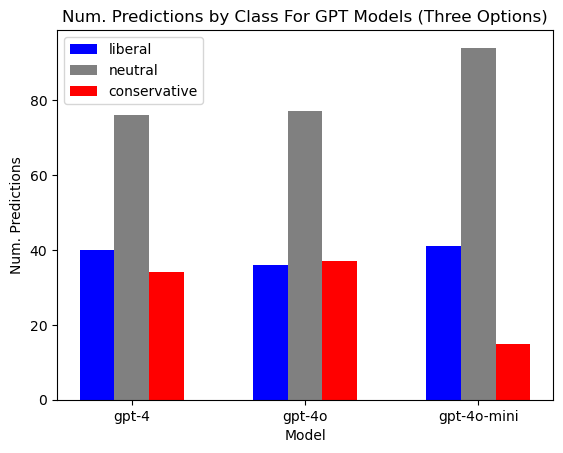

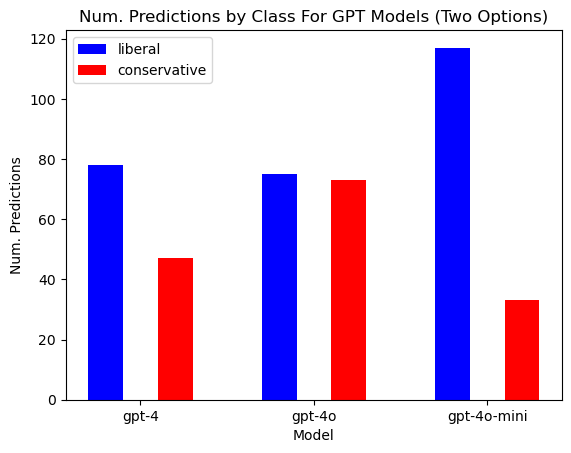

In [84]:
plot_gpt_models(liberal=liberal_preds, conservative=conservative_preds, neutral=neutral_preds, title="Num. Predictions by Class For GPT Models (Three Options)")
plot_gpt_models(liberal=liberal_preds_lc, conservative=conservative_preds_lc, title="Num. Predictions by Class For GPT Models (Two Options)")

In [85]:
gpt4o_data_libcon.classification.value_counts()

classification
Liberal                                                                                                                                                                                                                                                                                                                     75
Conservative                                                                                                                                                                                                                                                                                                                73
This sentence does not explicitly convey a political ideology. However, if forced to classify, it could be interpreted as highlighting issues related to crime and law enforcement, which are often emphasized in Conservative discourse. Therefore, Conservative.                                                           1
This sentence does not conta